In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


OBJECTIVE

The objective of this  is to build a model, learned using historical data, that will determine an employee's access needs, such that manual access transactions (grants and revokes) are minimized as the employee's attributes change over time. The model will take an employee's role information and a resource code and will return whether or not access should be granted

File Descriptions

train.csv - The training set. Each row has the ACTION (ground truth), RESOURCE, and information about the employee's role at the time of approval

test.csv - The test set for which predictions should be made. Each row asks whether an employee having the listed characteristics should have access to the listed resource.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Data Analysis

In [3]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [4]:
test.shape

(58921, 10)

In [5]:
train.shape

(32769, 10)

Train Data Analysis

In [6]:
train.columns

Index(['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE'],
      dtype='object')

In [9]:
train.describe

<bound method NDFrame.describe of        ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0           1     39353   85475         117961         118300         123472   
1           1     17183    1540         117961         118343         123125   
2           1     36724   14457         118219         118220         117884   
3           1     36135    5396         117961         118343         119993   
4           1     42680    5905         117929         117930         119569   
...       ...       ...     ...            ...            ...            ...   
32764       1     23497   16971         117961         118300         119993   
32765       1     25139  311198          91261         118026         122392   
32766       1     34924   28805         117961         118327         120299   
32767       1     80574   55643         118256         118257         117945   
32768       1     14354   59575         117916         118150         117920   

     

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [11]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [12]:
train.tail()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
32764,1,23497,16971,117961,118300,119993,118321,240983,290919,118322
32765,1,25139,311198,91261,118026,122392,121143,173805,249618,121145
32766,1,34924,28805,117961,118327,120299,124922,152038,118612,124924
32767,1,80574,55643,118256,118257,117945,280788,280788,292795,119082
32768,1,14354,59575,117916,118150,117920,118568,122142,19721,118570


In [13]:
train.isnull().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [14]:
train.duplicated().sum()

0

In [15]:
for i in train:
    print(i ,len(train[i].unique()))

ACTION 2
RESOURCE 7518
MGR_ID 4243
ROLE_ROLLUP_1 128
ROLE_ROLLUP_2 177
ROLE_DEPTNAME 449
ROLE_TITLE 343
ROLE_FAMILY_DESC 2358
ROLE_FAMILY 67
ROLE_CODE 343


from the above ROLE_TITLE 343 and ROLE_CODE 343 have same so that it will have chances having relation

Test Data Analysis

In [16]:
test.columns

Index(['id', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE'],
      dtype='object')

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58921 entries, 0 to 58920
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                58921 non-null  int64
 1   RESOURCE          58921 non-null  int64
 2   MGR_ID            58921 non-null  int64
 3   ROLE_ROLLUP_1     58921 non-null  int64
 4   ROLE_ROLLUP_2     58921 non-null  int64
 5   ROLE_DEPTNAME     58921 non-null  int64
 6   ROLE_TITLE        58921 non-null  int64
 7   ROLE_FAMILY_DESC  58921 non-null  int64
 8   ROLE_FAMILY       58921 non-null  int64
 9   ROLE_CODE         58921 non-null  int64
dtypes: int64(10)
memory usage: 4.5 MB


In [18]:
test.describe()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,58921.000000,58921.000000,58921.000000,58921.000000,58921.000000,58921.000000,58921.000000,58921.000000,58921.00000,58921.000000
mean,29461.000000,39383.739482,26691.645050,117028.638041,118316.334091,118858.006721,126358.019993,170455.861425,179278.05896,119707.754264
std,17009.171942,33717.397122,35110.244281,10805.446548,4284.678750,17916.179109,32068.294507,69684.692799,99639.96530,5326.979178
min,1.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.00000,117880.000000
25%,14731.000000,18418.000000,4663.000000,117961.000000,118096.000000,118378.000000,118259.000000,117913.000000,118331.00000,118055.000000
50%,29461.000000,33248.000000,14789.000000,117961.000000,118300.000000,118910.000000,118636.000000,129282.000000,118704.00000,118570.000000
75%,44191.000000,45481.000000,46512.000000,117961.000000,118386.000000,120410.000000,120006.000000,234813.000000,290919.00000,119353.000000
max,58921.000000,312136.000000,311779.000000,311178.000000,194897.000000,277693.000000,311867.000000,311867.000000,308574.00000,270691.000000


In [19]:
test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [20]:
test.tail()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
58916,58917,75078,4565,117961,118386,121961,118784,117906,290919,118786
58917,58918,6977,72209,117961,118225,124948,118054,118054,117887,118055
58918,58919,39262,6114,117961,118343,6104,118278,118260,290919,118279
58919,58920,1023,8674,117961,118327,120318,118321,117906,290919,118322
58920,58921,44977,3918,117961,118343,118660,119433,133686,118424,119435


In [21]:
test.isnull().sum()

id                  0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [22]:
test.duplicated().sum()

0

In [23]:
for i in test:
    print(i ,len(test[i].unique()) )

id 58921
RESOURCE 4971
MGR_ID 4689
ROLE_ROLLUP_1 126
ROLE_ROLLUP_2 177
ROLE_DEPTNAME 466
ROLE_TITLE 351
ROLE_FAMILY_DESC 2749
ROLE_FAMILY 68
ROLE_CODE 351


here also we have same which we have got in train data analysis this means this have correlation between them

Analysing Individual columns

In [24]:
train['ACTION'].value_counts()

ACTION
1    30872
0     1897
Name: count, dtype: int64

In [25]:
approved_actions=train[train.ACTION==1]

In [26]:
rejected_actions=train[train.ACTION==0]

In [27]:
approved_actions.shape

(30872, 10)

In [28]:
rejected_actions.shape

(1897, 10)

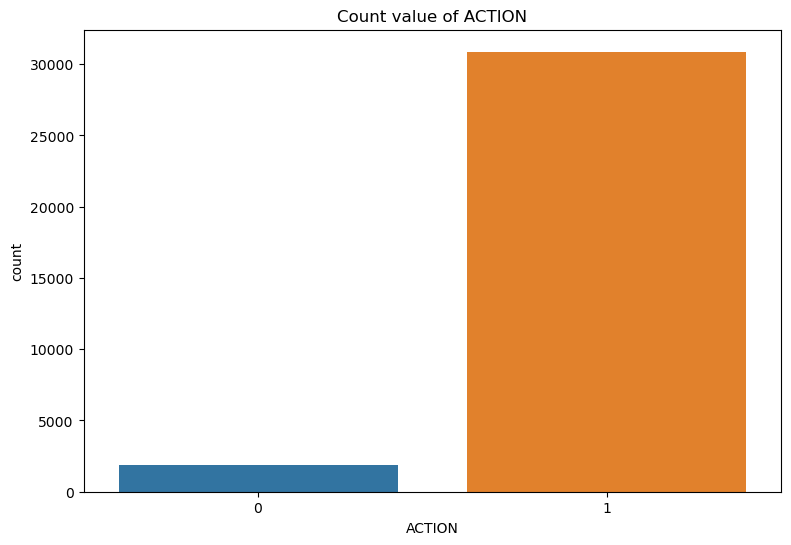

In [29]:
plt.figure(figsize=(9,6))
sns.countplot(x="ACTION",data=train)
plt.title("Count value of ACTION")
plt.show()

Resources

Text(0, 0.5, 'Probability Density')

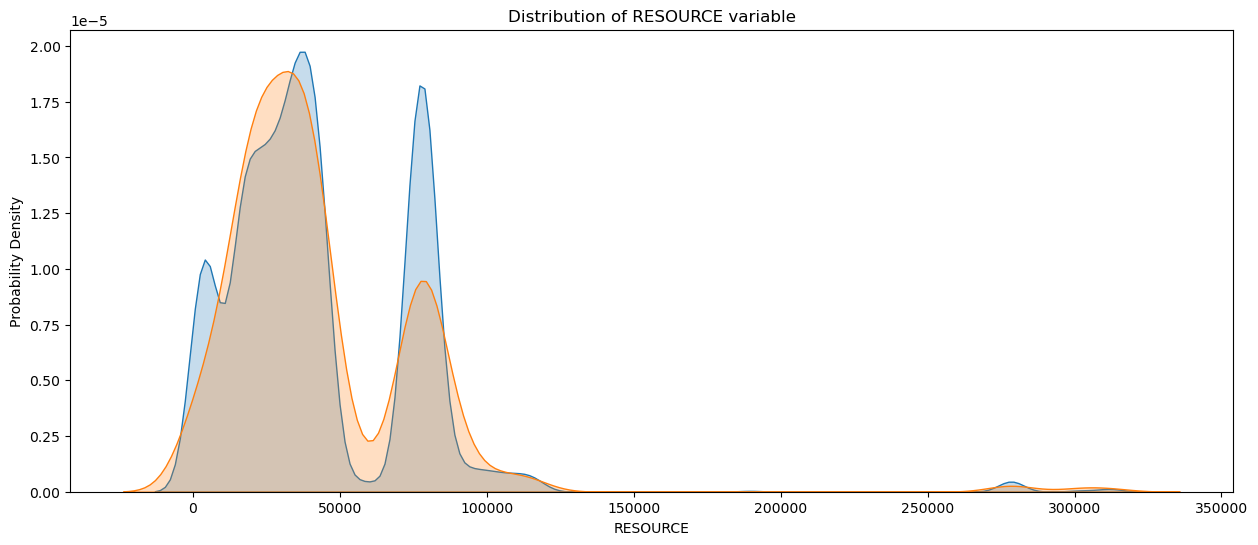

In [30]:
plt.figure(figsize=(15,6))
sns.kdeplot(approved_actions['RESOURCE'],label='Accepted',shade=True)
sns.kdeplot(rejected_actions['RESOURCE'],label='Rejected',shade=True)
plt.title('Distribution of RESOURCE variable')
plt.xlabel('RESOURCE')
plt.ylabel('Probability Density')

In [31]:
approved_actions['RESOURCE'].value_counts()

RESOURCE
4675      836
79092     468
75078     405
3853      398
25993     390
         ... 
29265       1
87823       1
112392      1
34080       1
32147       1
Name: count, Length: 7226, dtype: int64

In [32]:
approved_actions['RESOURCE'].value_counts()[:5]

RESOURCE
4675     836
79092    468
75078    405
3853     398
25993    390
Name: count, dtype: int64

In [33]:
approved_actions['RESOURCE'].value_counts()[5:10]

RESOURCE
75834    294
6977     283
32270    279
42085    237
17308    236
Name: count, dtype: int64

In [34]:
rejected_actions['RESOURCE'].value_counts()[:5]

RESOURCE
20897    42
18072    29
13878    22
27416    19
25993    19
Name: count, dtype: int64

In [35]:
rejected_actions['RESOURCE'].value_counts()[5:10]

RESOURCE
7543     17
6977     16
32270    16
79092    16
18913    13
Name: count, dtype: int64

Text(0, 0.5, 'Probability Density')

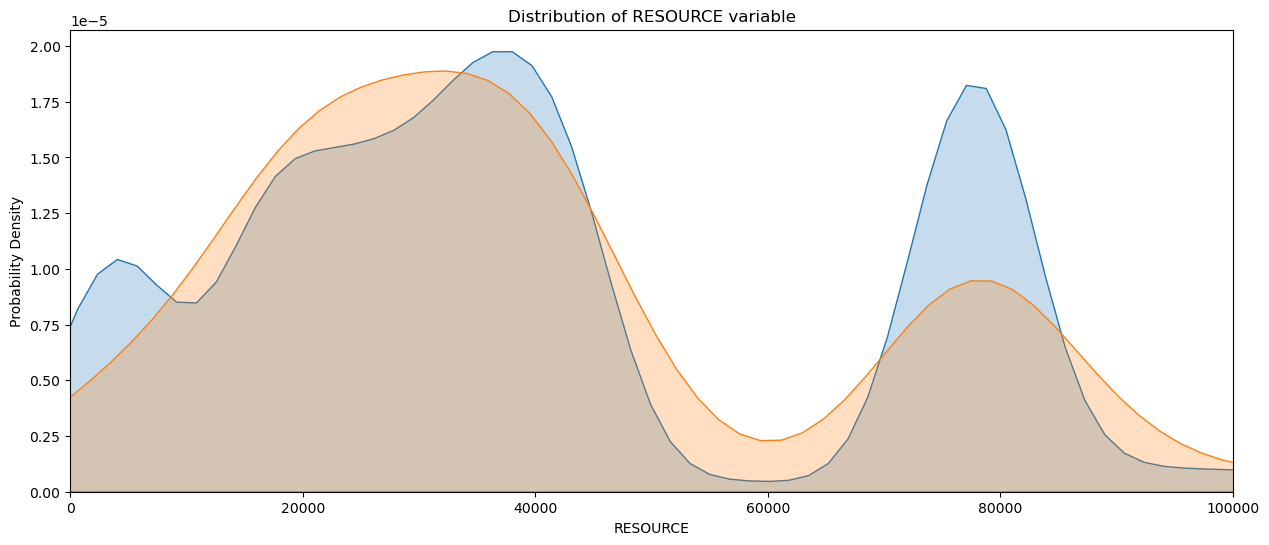

In [36]:
plt.figure(figsize=(15,6))
sns.kdeplot(approved_actions['RESOURCE'],label='Accepted',shade=True)
sns.kdeplot(rejected_actions['RESOURCE'],label='Rejected',shade=True)
plt.title('Distribution of RESOURCE variable')
plt.xlim(0,100000)
plt.xlabel('RESOURCE')
plt.ylabel('Probability Density')

MGR_ID

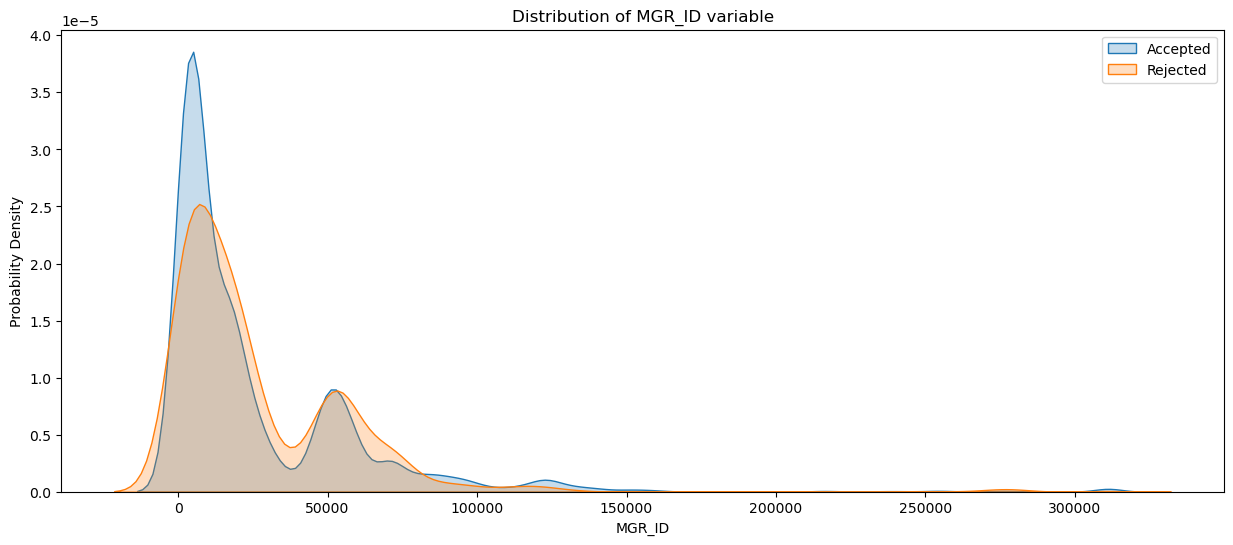

In [37]:
plt.figure(figsize=(15,6))
sns.kdeplot(approved_actions['MGR_ID'],label='Accepted',shade=True)
sns.kdeplot(rejected_actions['MGR_ID'],label='Rejected',shade=True)
plt.title('Distribution of MGR_ID variable')
plt.xlabel('MGR_ID')
plt.ylabel('Probability Density')
plt.legend()

In [38]:
approved_actions['MGR_ID'].value_counts()[:5]

MGR_ID
770     147
2270     96
2594     71
2014     67
1350     67
Name: count, dtype: int64

In [39]:
approved_actions['MGR_ID'].value_counts()[5:10]

MGR_ID
3966     63
16850    63
5396     62
7411     61
5244     60
Name: count, dtype: int64

In [40]:
rejected_actions['MGR_ID'].value_counts()[:5]

MGR_ID
54618    30
4084     17
46526    16
70062    16
51345    14
Name: count, dtype: int64

In [41]:
rejected_actions['MGR_ID'].value_counts()[5:10]

MGR_ID
4743     14
4341     14
19832    14
2837     13
49574    13
Name: count, dtype: int64

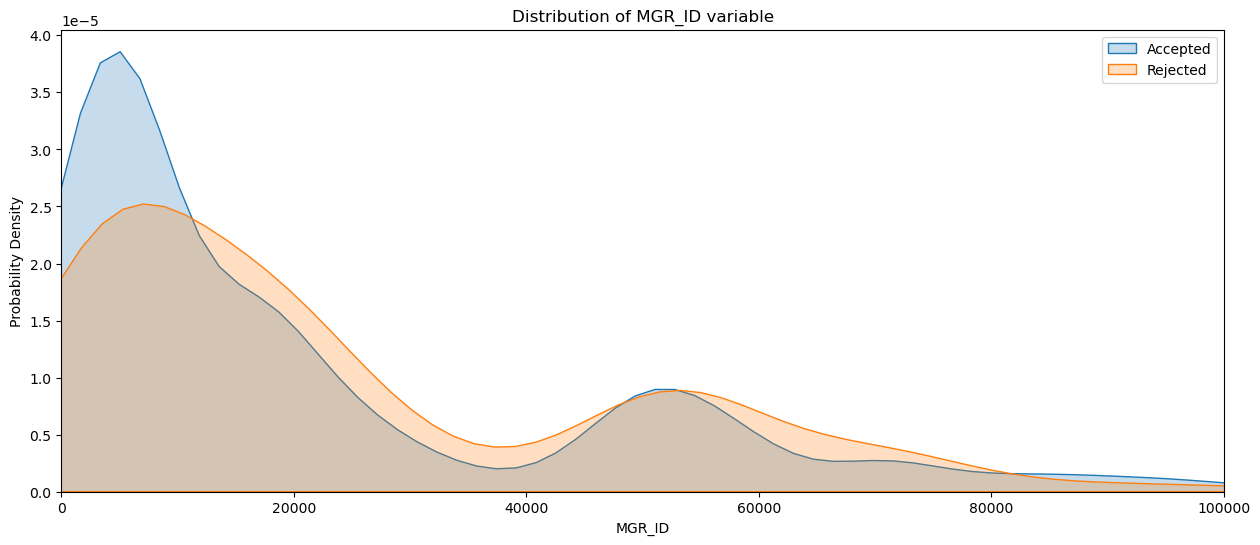

In [42]:
plt.figure(figsize=(15,6))
sns.kdeplot(approved_actions['MGR_ID'],label='Accepted',shade=True)
sns.kdeplot(rejected_actions['MGR_ID'],label='Rejected',shade=True)
plt.title('Distribution of MGR_ID variable')
plt.xlim(0,100000)
plt.xlabel('MGR_ID')
plt.ylabel('Probability Density')
plt.legend()

ROLE_ROLLUP_1

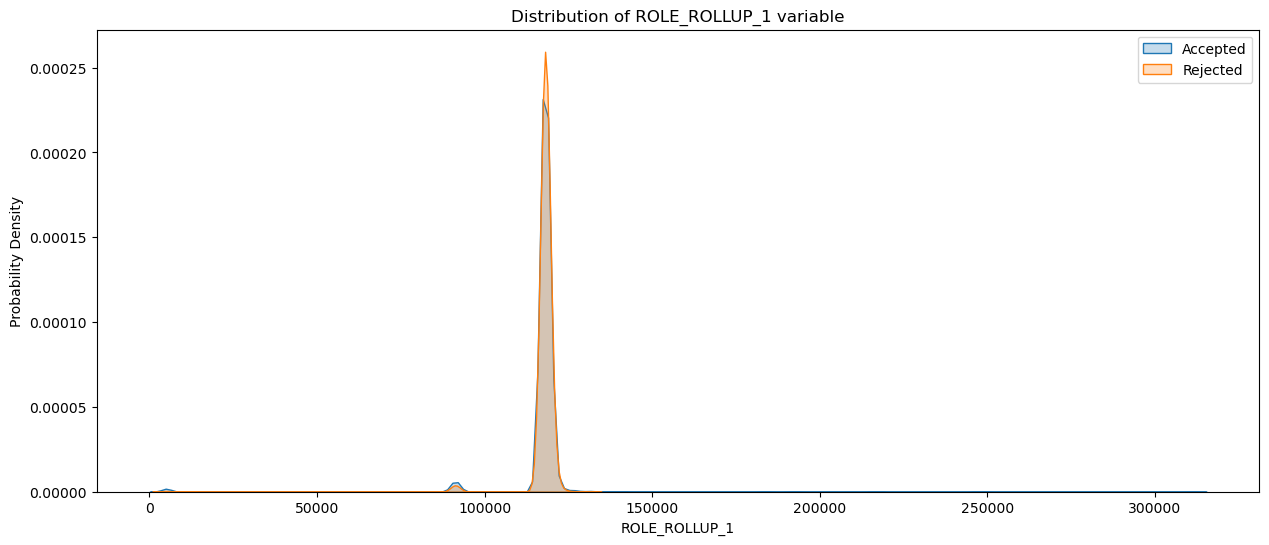

In [43]:
plt.figure(figsize=(15,6))
sns.kdeplot(approved_actions['ROLE_ROLLUP_1'],label='Accepted',shade=True)
sns.kdeplot(rejected_actions['ROLE_ROLLUP_1'],label='Rejected',shade=True)
plt.title('Distribution of ROLE_ROLLUP_1 variable')
plt.xlabel('ROLE_ROLLUP_1')
plt.ylabel('Probability Density')
plt.legend()

In [44]:
approved_actions['ROLE_ROLLUP_1'].value_counts()[:5]

ROLE_ROLLUP_1
117961    20320
117902      714
91261       695
118315      474
118212      385
Name: count, dtype: int64

In [45]:
rejected_actions['ROLE_ROLLUP_1'].value_counts()[:5]

ROLE_ROLLUP_1
117961    1087
118256      73
119062      50
118290      44
118079      42
Name: count, dtype: int64

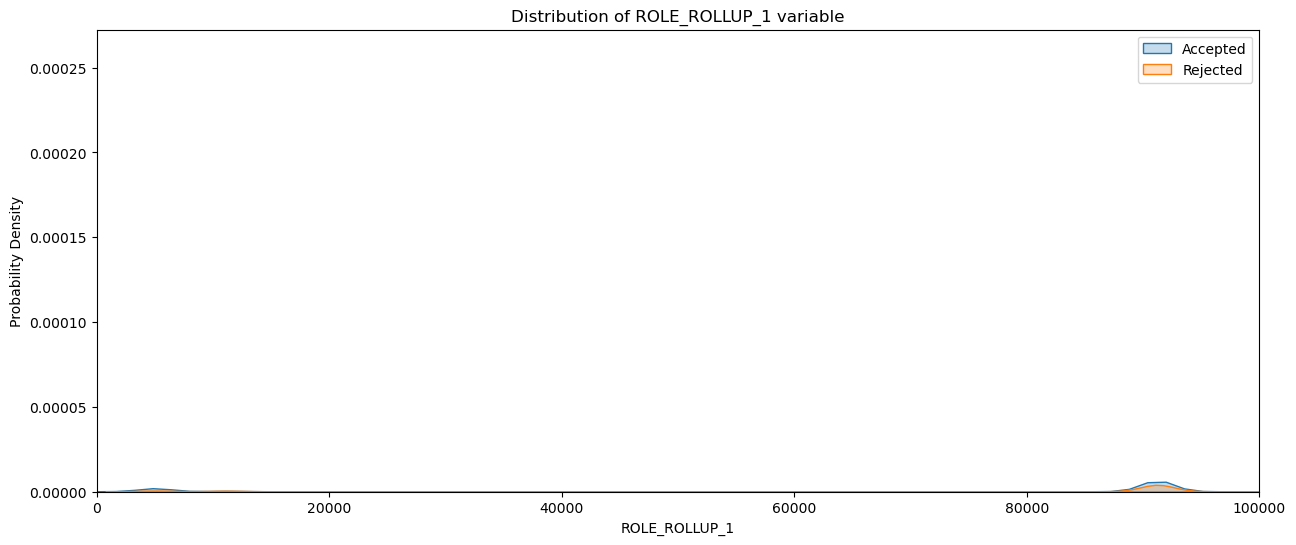

In [46]:
plt.figure(figsize=(15,6))
sns.kdeplot(approved_actions['ROLE_ROLLUP_1'],label='Accepted',shade=True)
sns.kdeplot(rejected_actions['ROLE_ROLLUP_1'],label='Rejected',shade=True)
plt.title('Distribution of ROLE_ROLLUP_1 variable')
plt.xlim(0,100000)
plt.xlabel('ROLE_ROLLUP_1')
plt.ylabel('Probability Density')
plt.legend()

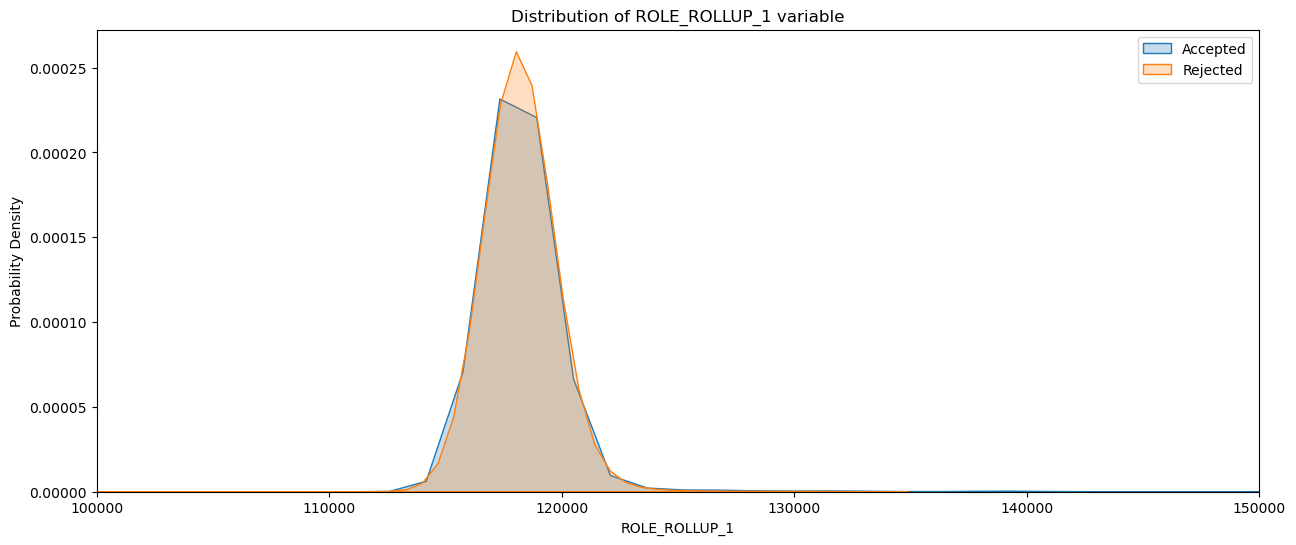

In [47]:
plt.figure(figsize=(15,6))
sns.kdeplot(approved_actions['ROLE_ROLLUP_1'], label='Accepted', shade=True)
sns.kdeplot(rejected_actions['ROLE_ROLLUP_1'], label='Rejected', shade=True)
plt.title('Distribution of ROLE_ROLLUP_1 variable')
plt.xlabel('ROLE_ROLLUP_1')
plt.xlim(100000,150000)
plt.ylabel('Probability Density')
plt.legend()

ROLE_DEPTNAME

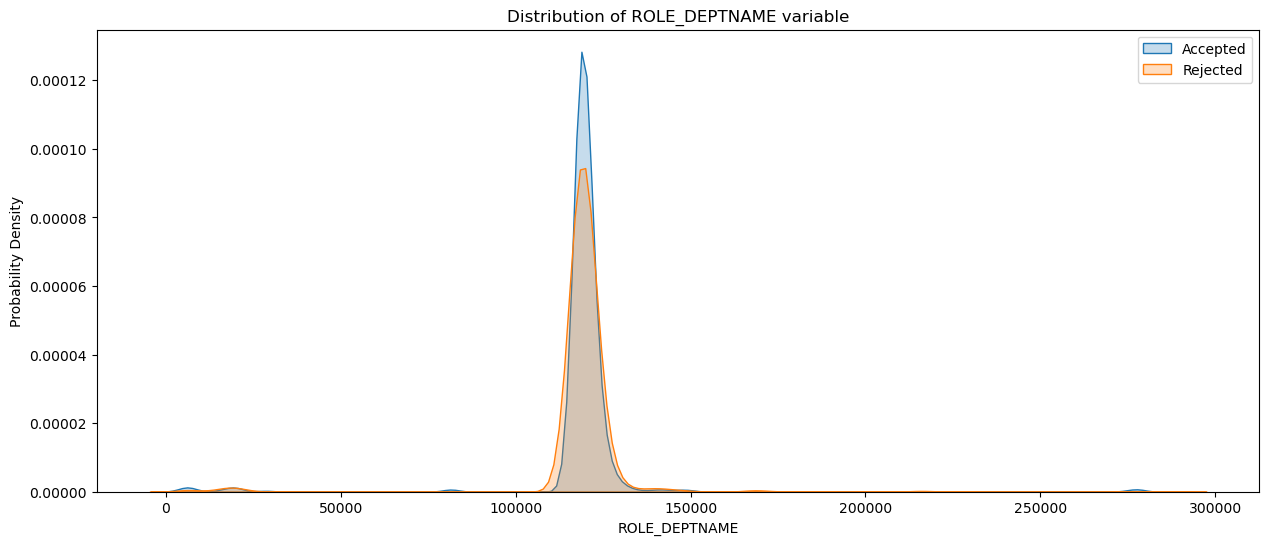

In [48]:
plt.figure(figsize=(15,6))
sns.kdeplot(approved_actions['ROLE_DEPTNAME'],label='Accepted',shade=True)
sns.kdeplot(rejected_actions['ROLE_DEPTNAME'],label='Rejected',shade=True)
plt.title('Distribution of ROLE_DEPTNAME variable')
plt.xlabel('ROLE_DEPTNAME')
plt.ylabel('Probability Density')
plt.legend()

In [49]:
approved_actions['ROLE_DEPTNAME'].value_counts()[:5]

ROLE_DEPTNAME
117878    1064
117941     700
118514     589
117945     570
117920     541
Name: count, dtype: int64

In [50]:
rejected_actions['ROLE_DEPTNAME'].value_counts()[:5]

ROLE_DEPTNAME
117945    89
118992    77
117878    71
117941    63
117920    56
Name: count, dtype: int64

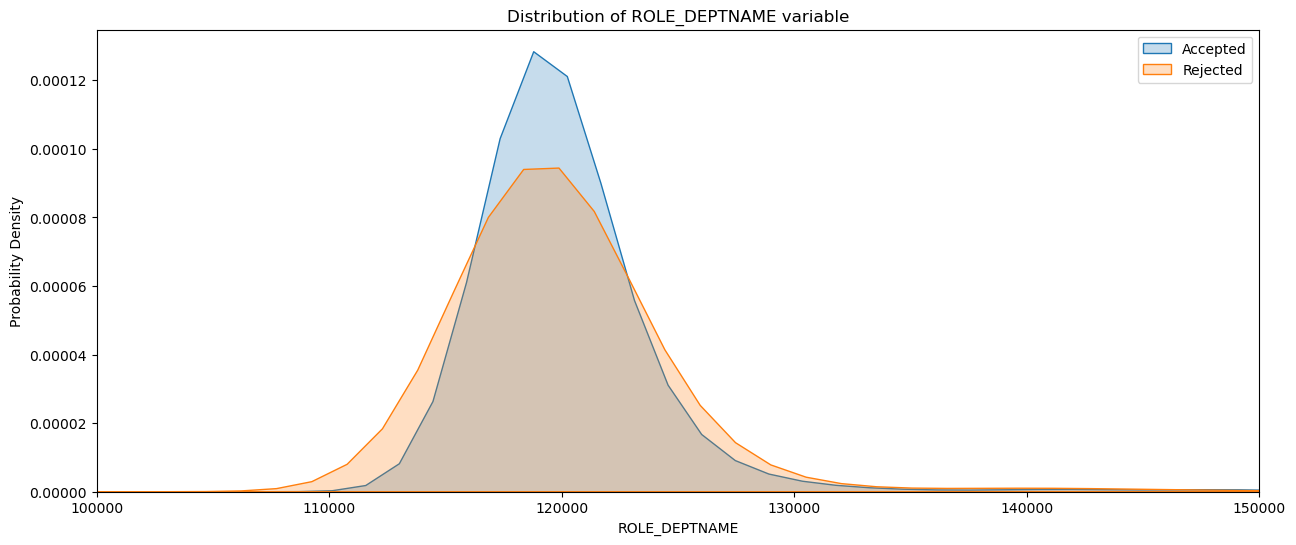

In [51]:
plt.figure(figsize=(15,6))
sns.kdeplot(approved_actions['ROLE_DEPTNAME'],label='Accepted',shade=True)
sns.kdeplot(rejected_actions['ROLE_DEPTNAME'],label='Rejected',shade=True)
plt.title('Distribution of ROLE_DEPTNAME variable')
plt.xlim(100000,150000)
plt.xlabel('ROLE_DEPTNAME')
plt.ylabel('Probability Density')
plt.legend()

ROLE_TITLE

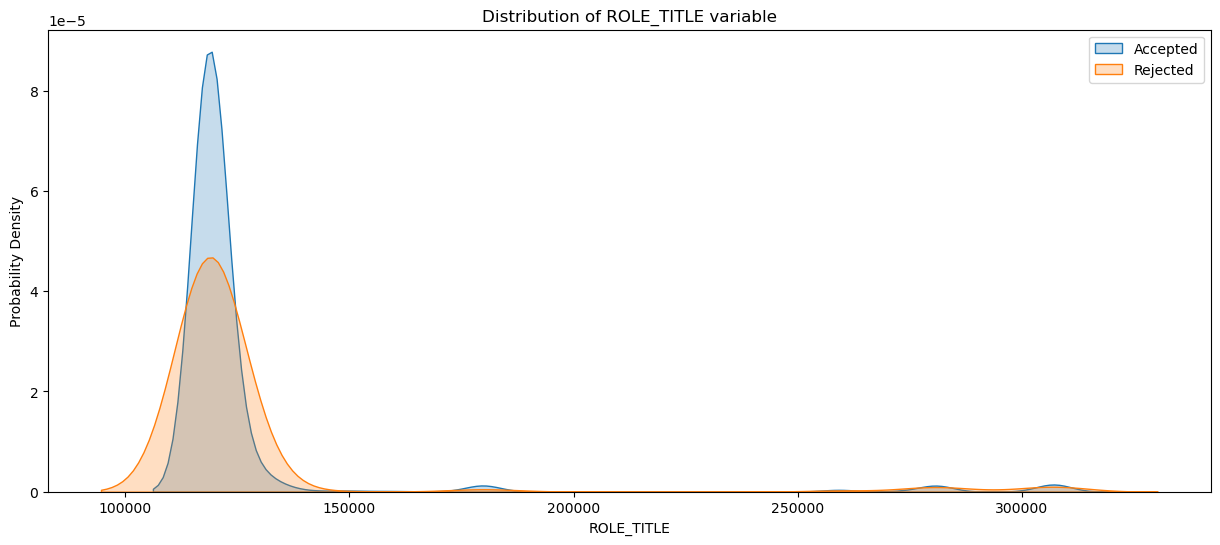

In [52]:
plt.figure(figsize=(15,6));
sns.kdeplot(approved_actions['ROLE_TITLE'],label='Accepted',shade=True);
sns.kdeplot(rejected_actions['ROLE_TITLE'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_TITLE variable');
plt.xlabel('ROLE_TITLE');
plt.ylabel('Probability Density');
plt.legend()

In [53]:
approved_actions['ROLE_TITLE'].value_counts()[:5]

ROLE_TITLE
118321    4279
117905    3467
118784    1647
117879    1117
118568     965
Name: count, dtype: int64

In [54]:
rejected_actions['ROLE_TITLE'].value_counts()[:5]

ROLE_TITLE
118321    370
117879    139
118784    125
117905    116
118568     78
Name: count, dtype: int64

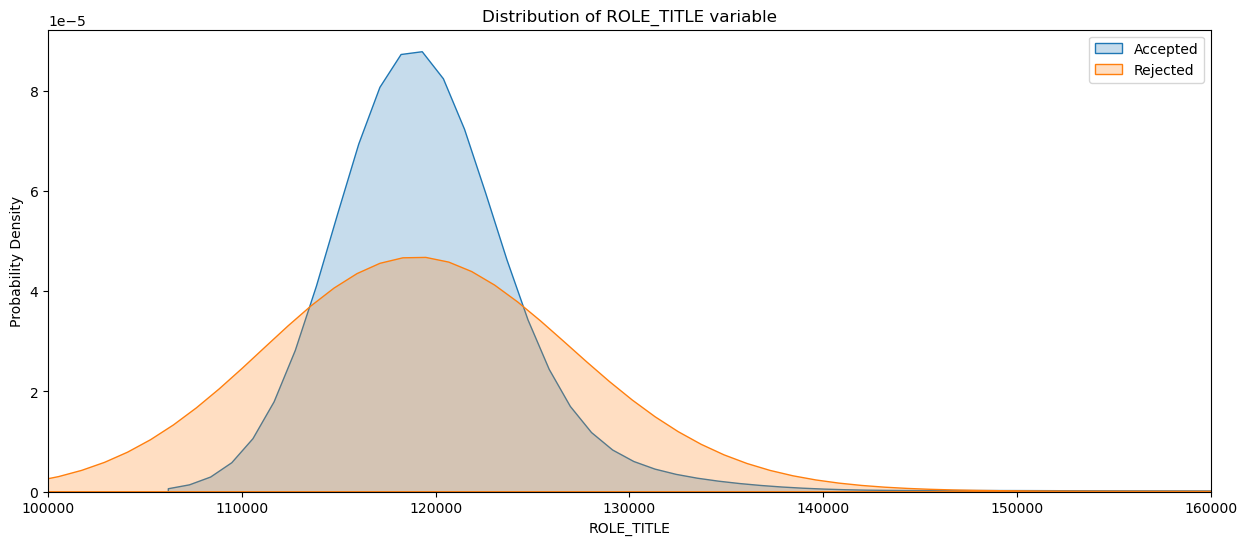

In [55]:
plt.figure(figsize=(15,6));
sns.kdeplot(approved_actions['ROLE_TITLE'],label='Accepted',shade=True);
sns.kdeplot(rejected_actions['ROLE_TITLE'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_TITLE variable');
plt.xlim(100000,160000)
plt.xlabel('ROLE_TITLE');
plt.ylabel('Probability Density');
plt.legend()

ROLE_FAMILY_DESC

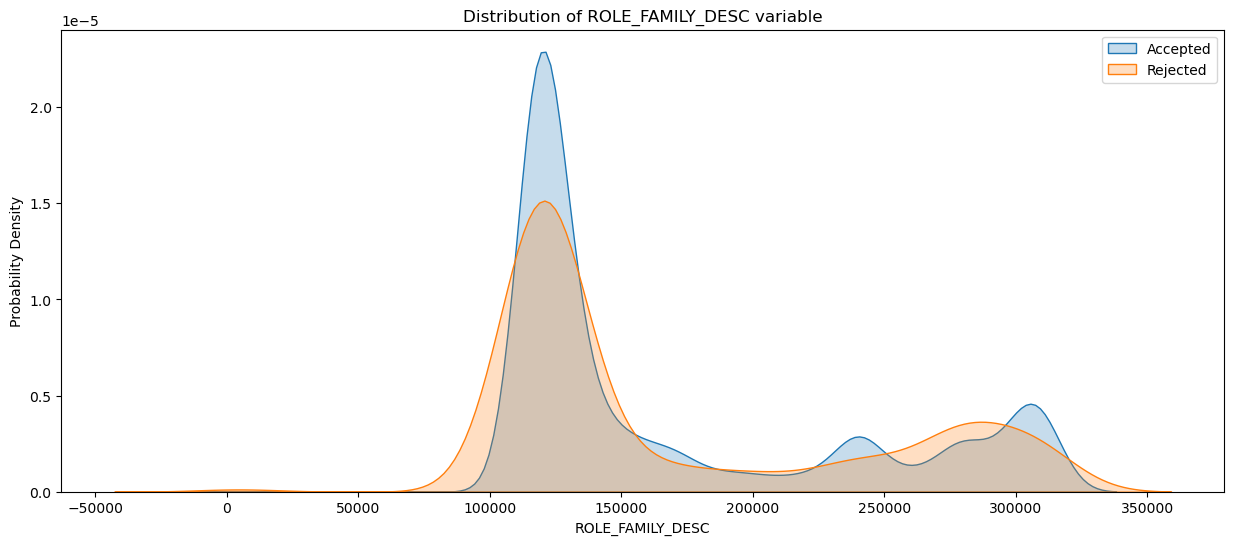

In [56]:
plt.figure(figsize=(15,6))
sns.kdeplot(approved_actions['ROLE_FAMILY_DESC'],label='Accepted',shade=True)
sns.kdeplot(rejected_actions['ROLE_FAMILY_DESC'],label='Rejected',shade=True)
plt.title('Distribution of ROLE_FAMILY_DESC variable')
plt.xlabel('ROLE_FAMILY_DESC')
plt.ylabel('Probability Density')
plt.legend()

In [57]:
approved_actions['ROLE_FAMILY_DESC'].value_counts()[:5]

ROLE_FAMILY_DESC
117906    6437
240983    1189
117913     649
279443     615
117886     478
Name: count, dtype: int64

In [58]:
rejected_actions['ROLE_FAMILY_DESC'].value_counts()[:5]

ROLE_FAMILY_DESC
117906    459
240983     55
117886     52
279443     50
117897     39
Name: count, dtype: int64

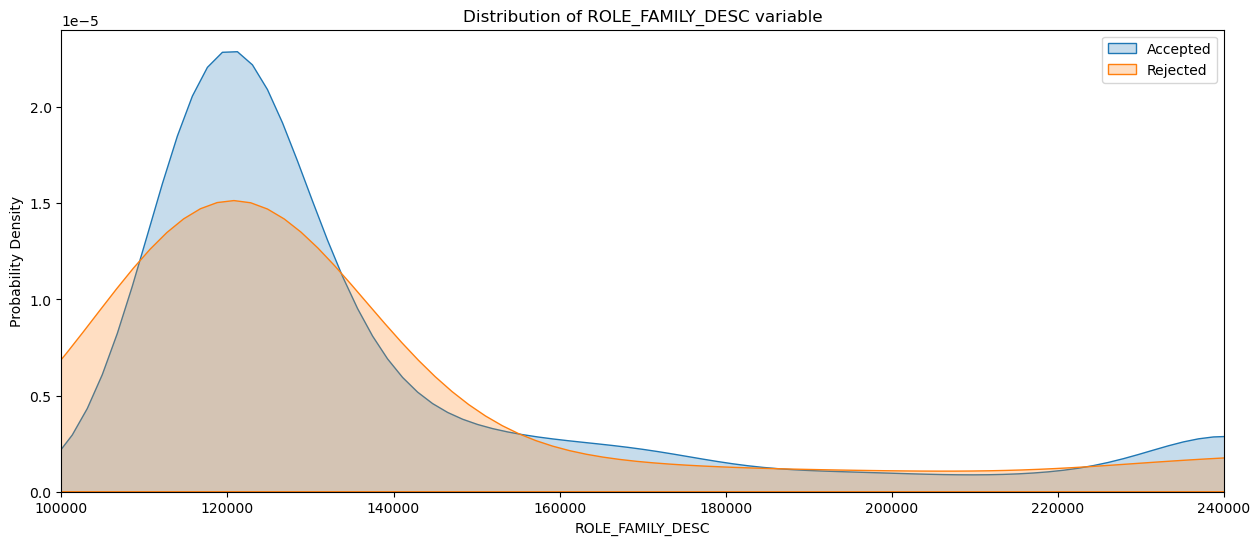

In [59]:
plt.figure(figsize=(15,6))
sns.kdeplot(approved_actions['ROLE_FAMILY_DESC'],label='Accepted',shade=True)
sns.kdeplot(rejected_actions['ROLE_FAMILY_DESC'],label='Rejected',shade=True)
plt.title('Distribution of ROLE_FAMILY_DESC variable')
plt.xlim(100000,240000)
plt.xlabel('ROLE_FAMILY_DESC')
plt.ylabel('Probability Density')
plt.legend()

ROLE_FAMILY

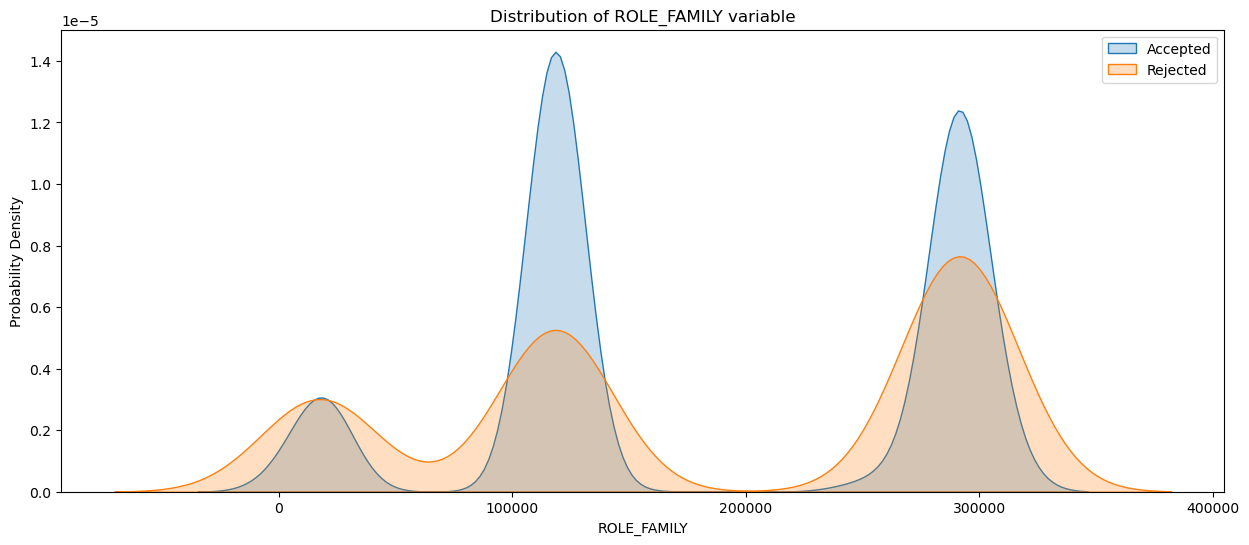

In [60]:
plt.figure(figsize=(15,6))
sns.kdeplot(approved_actions['ROLE_FAMILY'],label='Accepted',shade=True)
sns.kdeplot(rejected_actions['ROLE_FAMILY'],label='Rejected',shade=True)
plt.title('Distribution of ROLE_FAMILY variable')
plt.xlabel('ROLE_FAMILY')
plt.ylabel('Probability Density')
plt.legend()

In [61]:
approved_actions['ROLE_FAMILY'].value_counts()[:5]

ROLE_FAMILY
290919    10347
118424     2616
19721      2393
117887     2302
118398     1232
Name: count, dtype: int64

In [62]:
rejected_actions['ROLE_FAMILY'].value_counts()[:5]

ROLE_FAMILY
290919    633
19721     243
292795    181
117887     98
118424     74
Name: count, dtype: int64

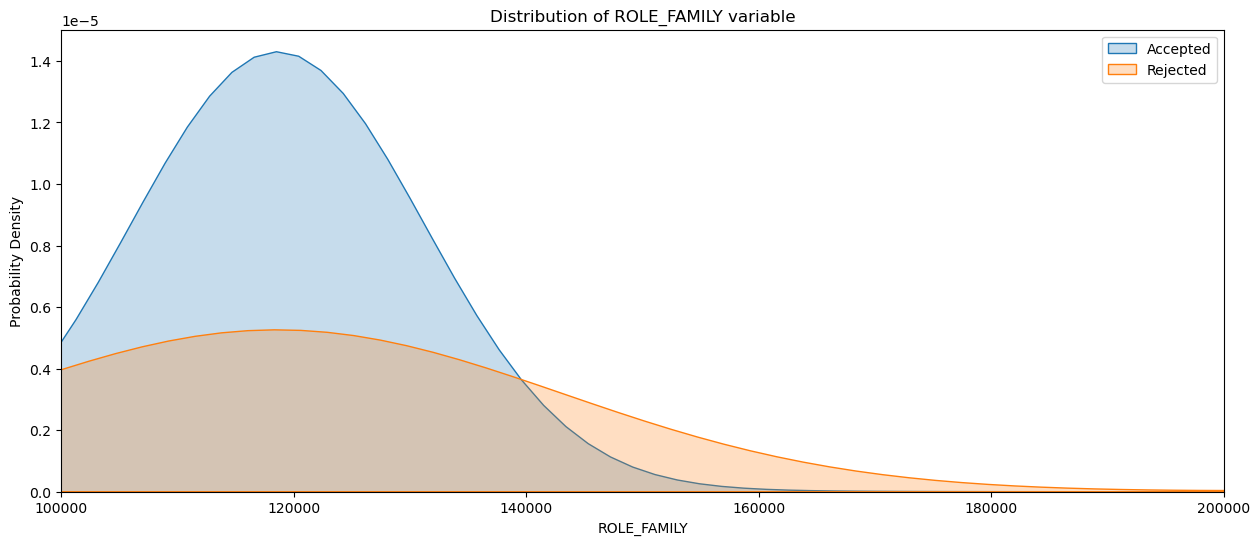

In [63]:
plt.figure(figsize=(15,6))
sns.kdeplot(approved_actions['ROLE_FAMILY'],label='Accepted',shade=True)
sns.kdeplot(rejected_actions['ROLE_FAMILY'],label='Rejected',shade=True)
plt.title('Distribution of ROLE_FAMILY variable')
plt.xlim(100000,200000)
plt.xlabel('ROLE_FAMILY')
plt.ylabel('Probability Density')
plt.legend()

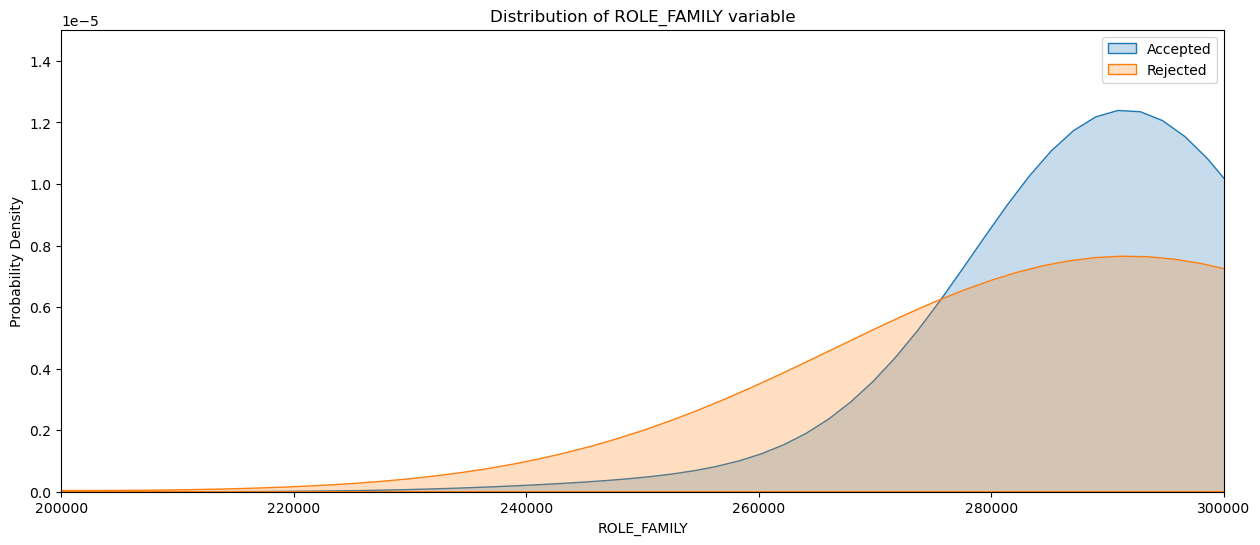

In [64]:
plt.figure(figsize=(15,6))
sns.kdeplot(approved_actions['ROLE_FAMILY'],label='Accepted',shade=True)
sns.kdeplot(rejected_actions['ROLE_FAMILY'],label='Rejected',shade=True)
plt.title('Distribution of ROLE_FAMILY variable')
plt.xlim(200000,300000)
plt.xlabel('ROLE_FAMILY')
plt.ylabel('Probability Density')
plt.legend()

ROLE_CODE

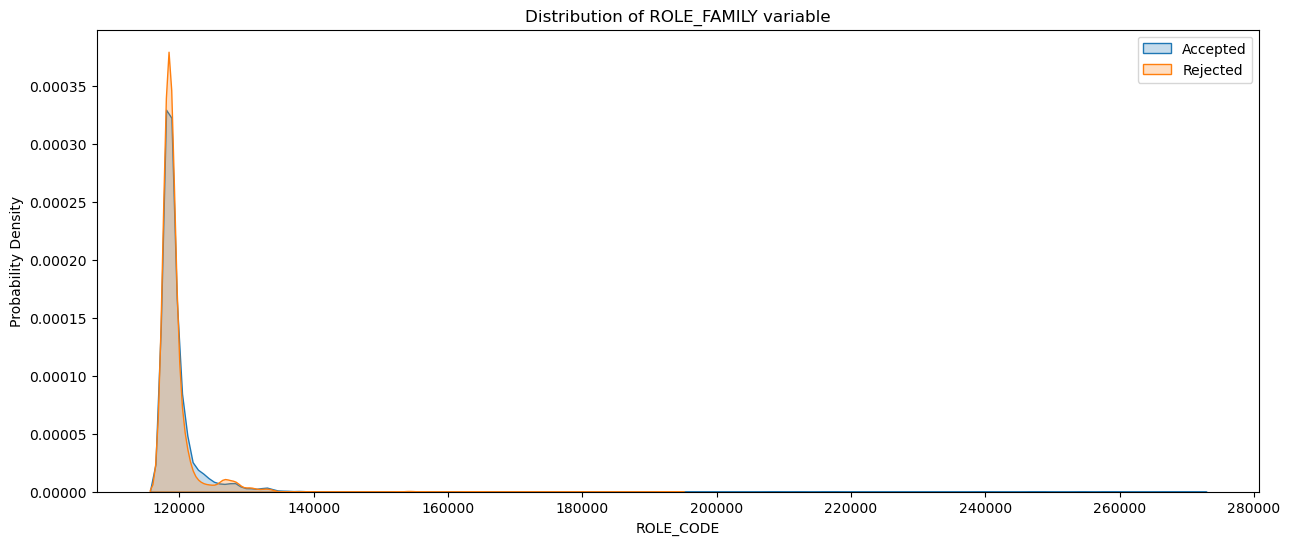

In [65]:
plt.figure(figsize=(15,6))
sns.kdeplot(approved_actions['ROLE_CODE'],label='Accepted',shade=True)
sns.kdeplot(rejected_actions['ROLE_CODE'],label='Rejected',shade=True)
plt.title('Distribution of ROLE_FAMILY variable')
plt.xlabel('ROLE_CODE')
plt.ylabel('Probability Density')
plt.legend()

In [66]:
approved_actions['ROLE_CODE'].value_counts()[:5]

ROLE_CODE
118322    4279
117908    3467
118786    1647
117880    1117
118570     965
Name: count, dtype: int64

In [67]:
rejected_actions['ROLE_CODE'].value_counts()[:5]

ROLE_CODE
118322    370
117880    139
118786    125
117908    116
118570     78
Name: count, dtype: int64

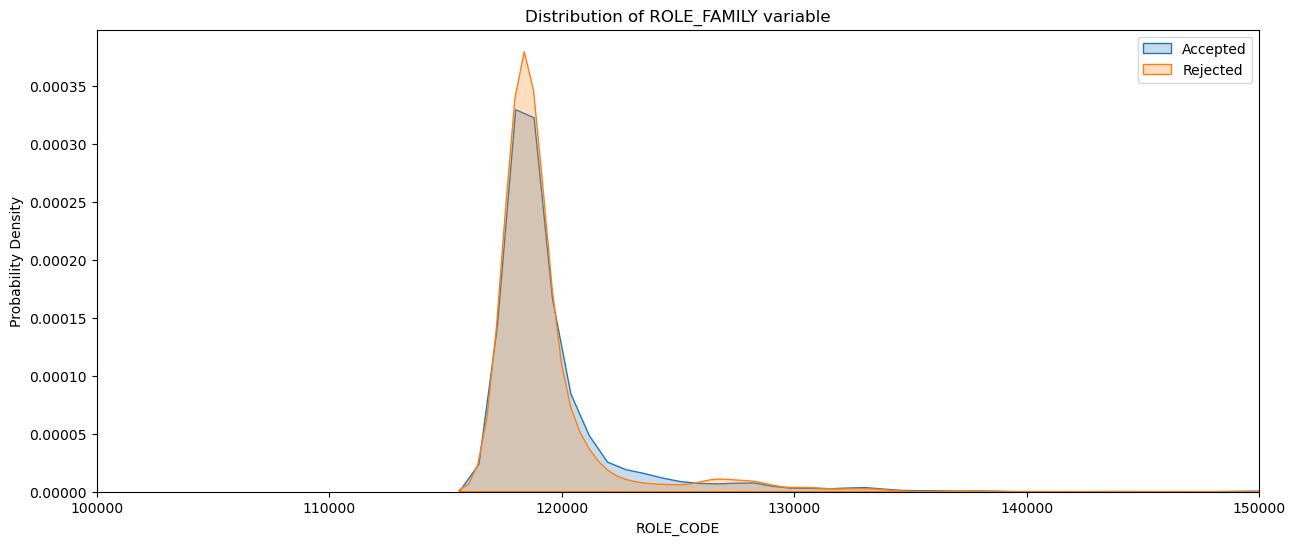

In [68]:
plt.figure(figsize=(15,6))
sns.kdeplot(approved_actions['ROLE_CODE'],label='Accepted',shade=True)
sns.kdeplot(rejected_actions['ROLE_CODE'],label='Rejected',shade=True)
plt.title('Distribution of ROLE_FAMILY variable')
plt.xlim(100000,150000)
plt.xlabel('ROLE_CODE')
plt.ylabel('Probability Density')
plt.legend()

array([[<Axes: title={'center': 'ACTION'}>,
        <Axes: title={'center': 'RESOURCE'}>,
        <Axes: title={'center': 'MGR_ID'}>],
       [<Axes: title={'center': 'ROLE_ROLLUP_1'}>,
        <Axes: title={'center': 'ROLE_ROLLUP_2'}>,
        <Axes: title={'center': 'ROLE_DEPTNAME'}>],
       [<Axes: title={'center': 'ROLE_TITLE'}>,
        <Axes: title={'center': 'ROLE_FAMILY_DESC'}>,
        <Axes: title={'center': 'ROLE_FAMILY'}>],
       [<Axes: title={'center': 'ROLE_CODE'}>, <Axes: >, <Axes: >]],
      dtype=object)

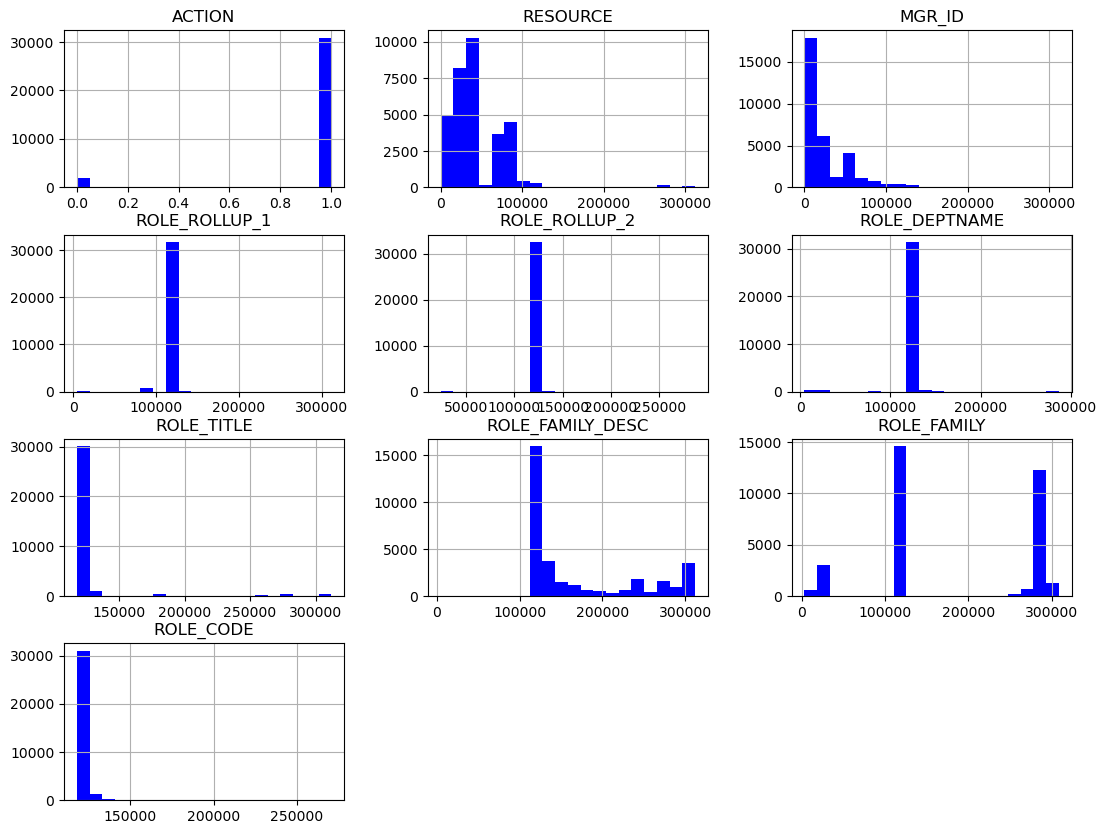

In [69]:
train[['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE']].hist(figsize=(13,10),bins=20,color='blue')

Text(0.5, 1.0, 'Heatmap between all features')

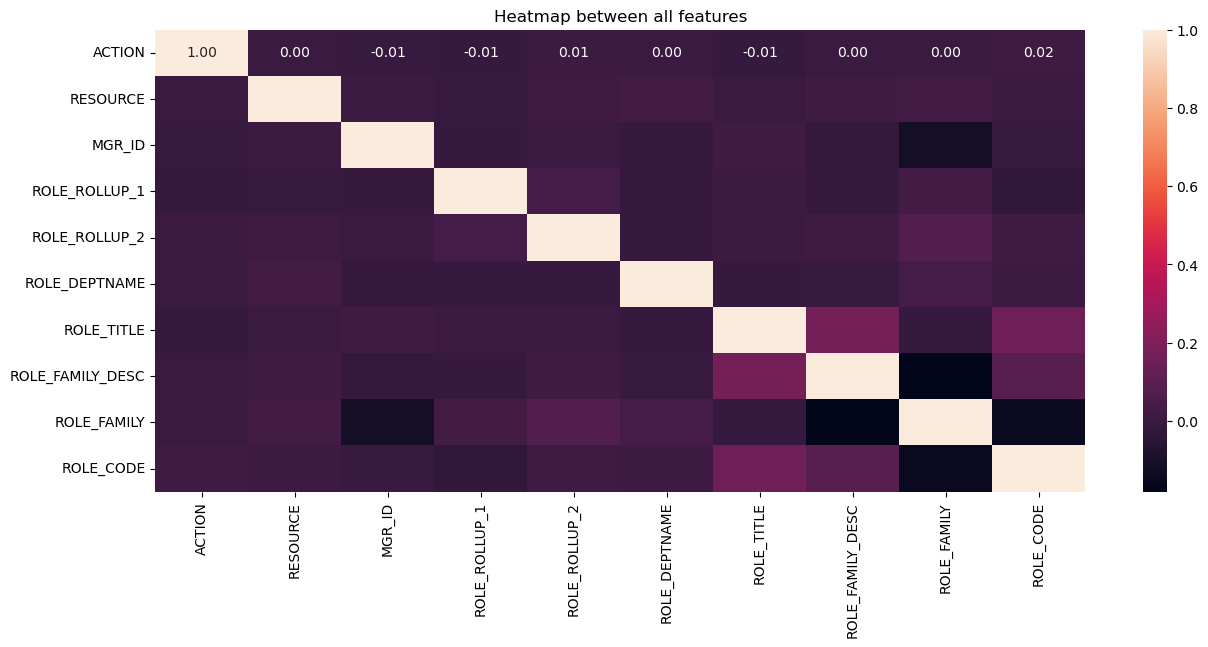

In [70]:
plt.figure(figsize=(15,6))
sns.heatmap(train.corr() , annot=True, fmt='.2f')
plt.title('Heatmap between all features')

<Figure size 1500x600 with 0 Axes>

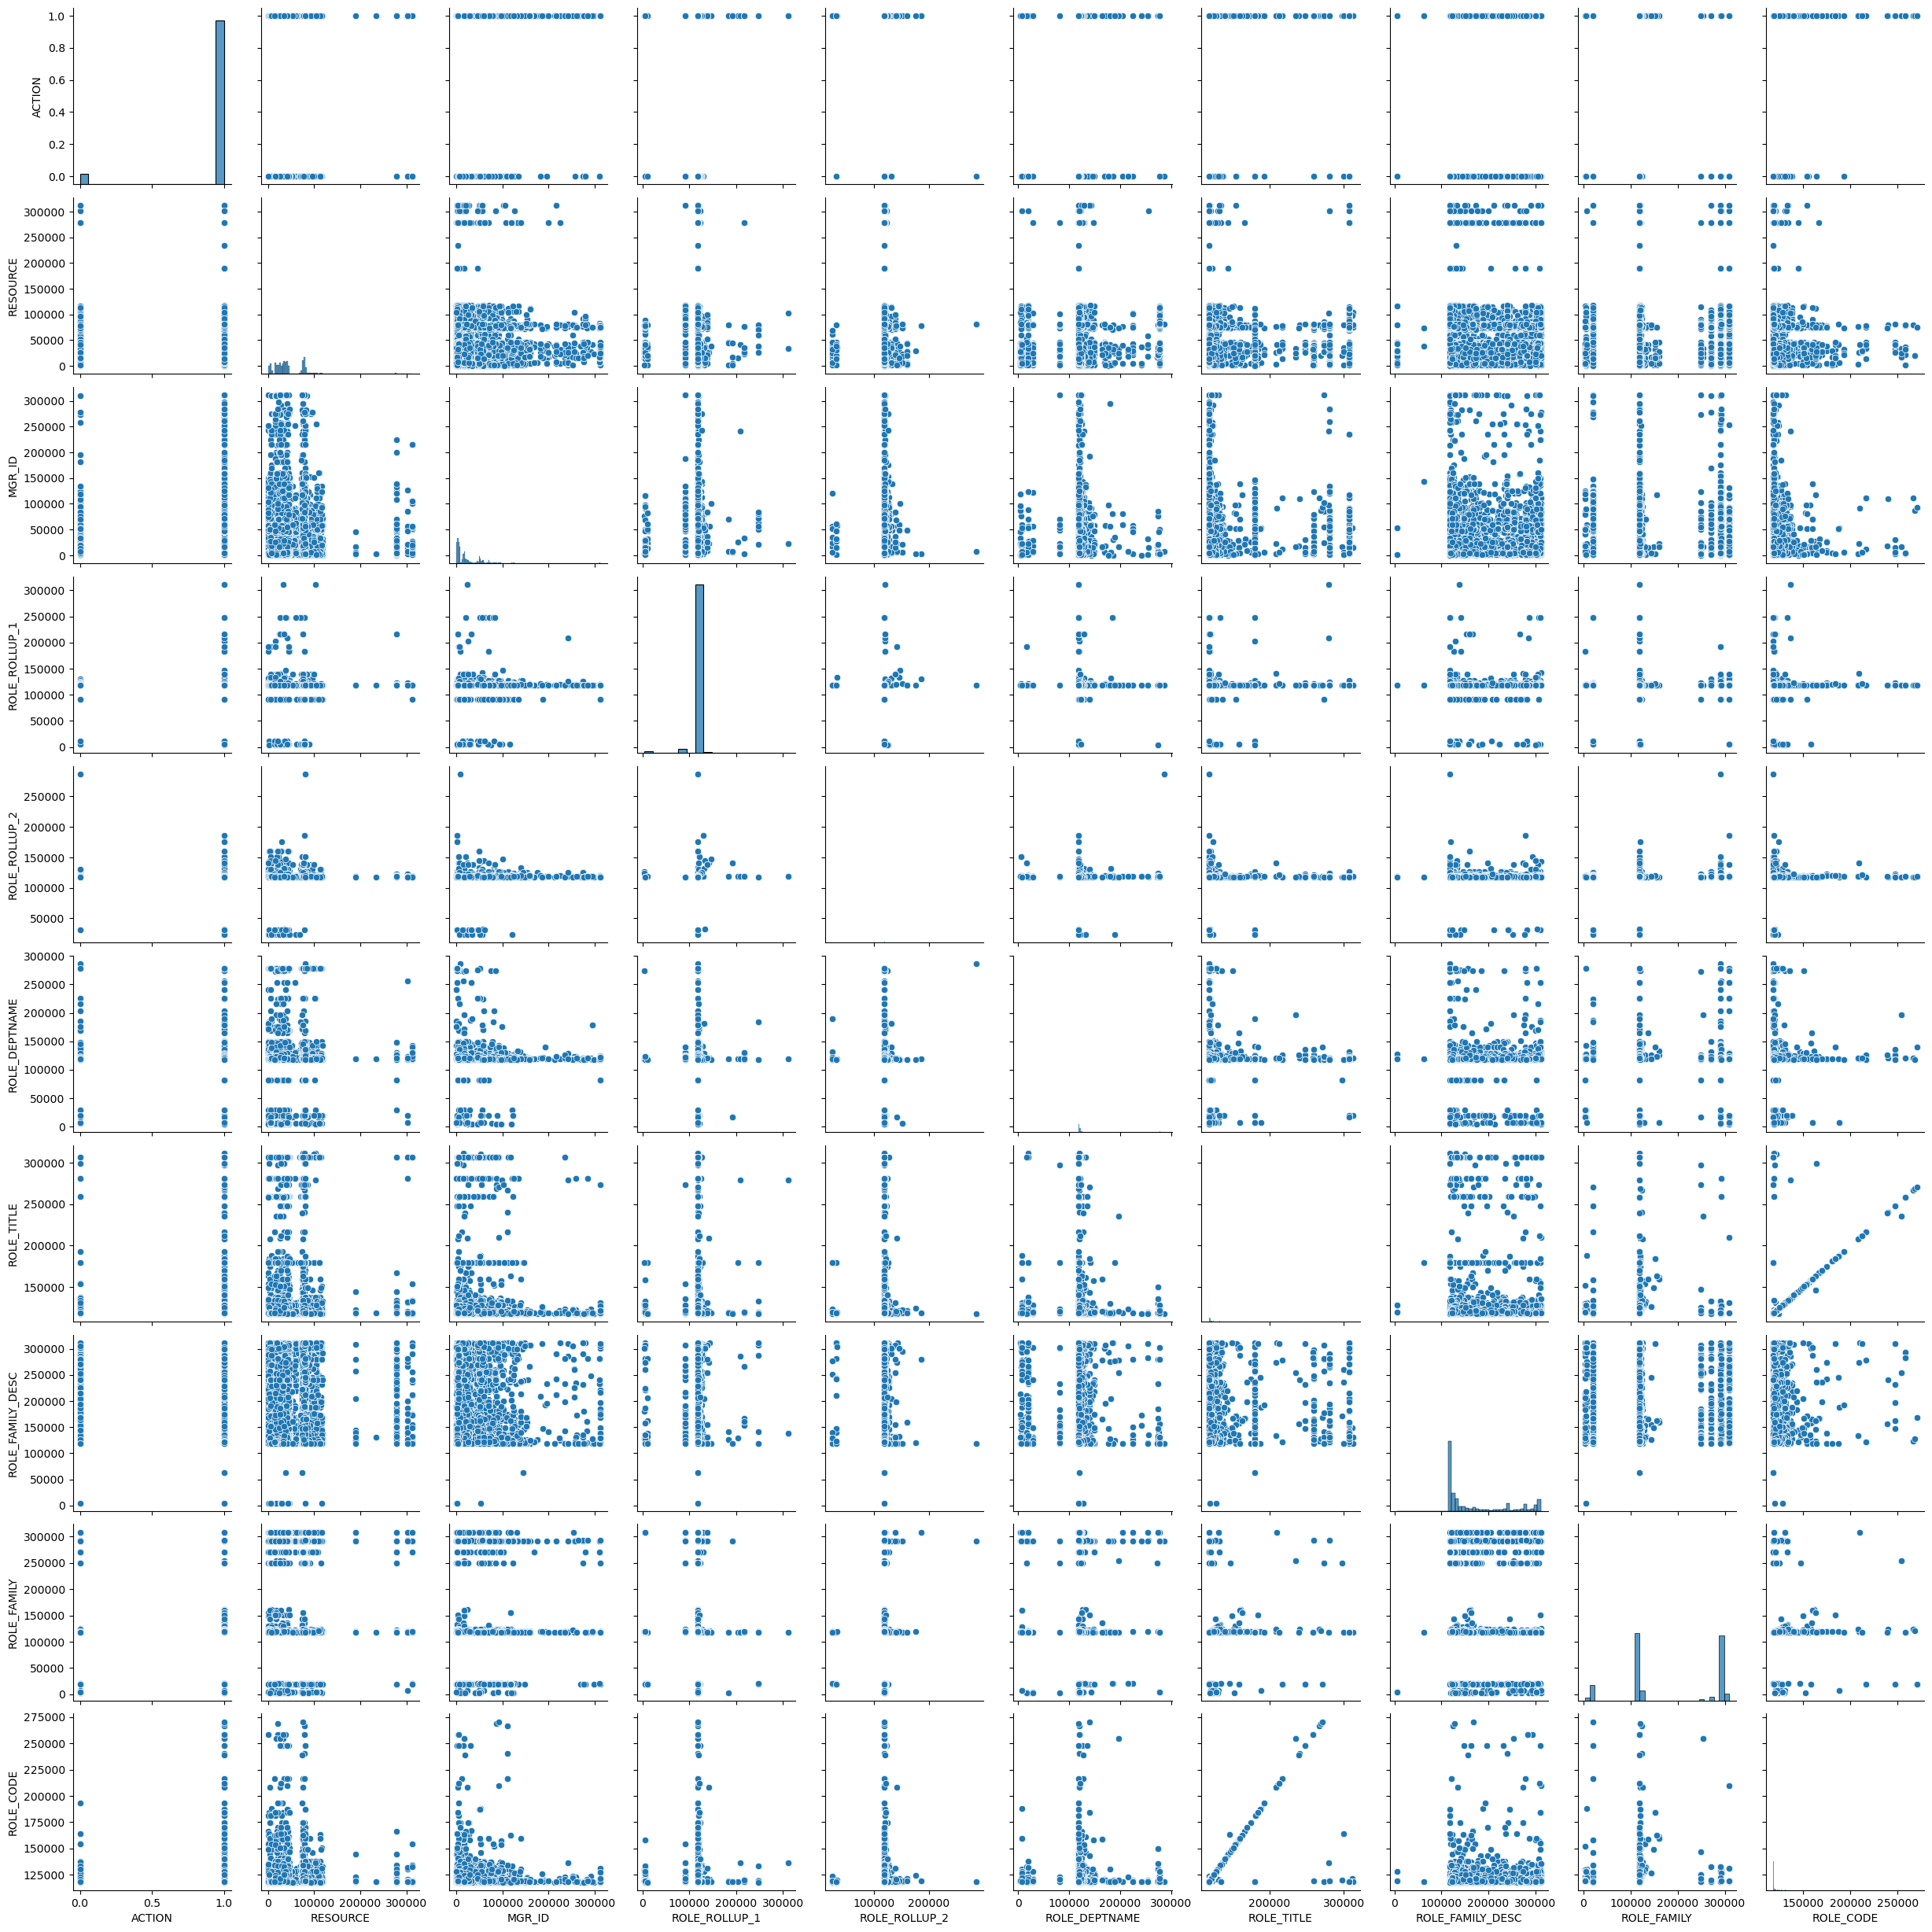

In [71]:
plt.figure(figsize=(15,6))
sns.pairplot(train[['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2','ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY','ROLE_CODE']])

Observation:
There is only relationship b/w ROLE_CODE and ROLE_TITLE